In [228]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
%matplotlib inline

pd.set_option("display.max_columns", 200)
prospects = pd.read_csv("player_data/prospects.csv")
prospects.head()

,ncaa_player_name,rookie_Age,ncaa_team,Full Role,scouting_report,projected_range,ncaa_rim_fg%,ncaa_mid_fg%,ncaa_3p%,length_pc1,explosive_pc2,P(Bust),P(Star),mean_AST_2_TOV,mean_AST_2_FG,mean_AST%,mean_TOV%,mean_USG%,mean_PPP,mean_0-3_prop,mean_3-10_prop,mean_10-16_prop,mean_16-3P_prop,mean_corner_%3PA,mean_2P_%astd,mean_3P_%astd,mean_0-3_fg%,mean_3-10_fg%,mean_10-16_fg%,mean_16-3P_fg%,mean_3P_fg%,mean_corner_3P%,mean_STL%,mean_BLK%,mean_ORB%,mean_DRB%,mean_3P_prop_not_corner,floor_AST_2_TOV,floor_AST_2_FG,floor_AST%,floor_TOV%,floor_USG%,floor_PPP,floor_0-3_prop,floor_3-10_prop,floor_10-16_prop,floor_16-3P_prop,floor_corner_%3PA,floor_2P_%astd,floor_3P_%astd,floor_0-3_fg%,floor_3-10_fg%,floor_10-16_fg%,floor_16-3P_fg%,floor_3P_fg%,floor_corner_3P%,floor_STL%,floor_BLK%,floor_ORB%,floor_DRB%,floor_3P_prop_not_corner,ceiling_AST_2_TOV,ceiling_AST_2_FG,ceiling_AST%,ceiling_TOV%,ceiling_USG%,ceiling_PPP,ceiling_0-3_prop,ceiling_3-10_prop,ceiling_10-16_prop,ceiling_16-3P_prop,ceiling_corner_%3PA,ceiling_2P_%astd,ceiling_3P_%astd,ceiling_0-3_fg%,ceiling_3-10_fg%,ceiling_10-16_fg%,ceiling_16-3P_fg%,ceiling_3P_fg%,ceiling_corner_3P%,ceiling_STL%,ceiling_BLK%,ceiling_ORB%,ceiling_DRB%,ceiling_3P_prop_not_corner,Mean_Primary_Cluster,Mean_Primary_Cluster_Prob,Mean_Secondary_Cluster,Mean_Secondary_Cluster_Prob,Mean Full Role,floor_Primary_Cluster,floor_Primary_Cluster_Prob,floor_Secondary_Cluster,floor_Secondary_Cluster_Prob,floor Full Role,ceiling_Primary_Cluster,ceiling_Primary_Cluster_Prob,ceiling_Secondary_Cluster,ceiling_Secondary_Cluster_Prob,ceiling Full Role,floor_comp,floor_comp_id,floor_comp_pts,floor_comp_reb,floor_comp_ast,floor_comp_dbpm,med_comp,med_comp_id,med_comp_pts,med_comp_reb,med_comp_ast,med_comp_dbpm,ceiling_comp,ceiling_comp_id,ceiling_comp_pts,ceiling_comp_reb,ceiling_comp_ast,ceiling_comp_dbpm
0,Brandon Miller,20,Alabama,Scoring Wing,Miller has what it takes to be an elite two-wa...,Top 3,-0.924127,-0.670726,0.565572,-1.044236,-0.366493,0.065335,0.084000,1.662995,0.232250,12.224834,11.422900,19.270333,0.983201,0.269873,0.171601,0.079319,0.085119,0.110657,0.336233,0.355356,0.657068,0.394025,0.378938,0.344453,0.337876,0.358605,1.579192,1.614643,4.624532,15.409667,0.283210,1.504480,0.212965,10.969260,10.284087,18.332248,0.954876,0.249648,0.162966,0.070506,0.070987,0.101062,0.286124,0.337653,0.643887,0.390641,0.370040,0.342474,0.334154,0.343055,1.532365,1.108759,3.840714,14.073979,0.254824,1.782923,0.245295,13.114927,11.959478,20.014076,1.000978,0.287758,0.189274,0.080038,0.089124,0.133082,0.398611,0.403812,0.663765,0.409197,0.389899,0.370215,0.354963,0.379406,1.610503,1.844847,5.175022,17.111227,0.293302,Floor Spacer,0.697,Skilled Big,0.299,Stretch Four,Floor Spacer,0.803,None,0.182,Floor Spacer,Floor Spacer,0.566,Skilled Big,0.433,Stretch Four,James Young,youngja01,12.73,6.20,1.70,0.10,Terrence Ross,rosste01,23.47,6.00,2.23,-0.27,Brandon Ingram,ingrabr01,32.87,7.93,6.87,-0.70
1,Jarace Walker,19,Houston,Skilled Forward,"Walker is a stocky, explosive player that need...",4 to 10,0.968472,0.127234,0.152875,-0.236010,-2.089477,0.143213,0.085133,1.569271,0.240254,12.663185,12.156624,19.393629,0.980048,0.325547,0.190808,0.076719,0.078653,0.093370,0.379173,0.293434,0.669192,0.393439,0.360428,0.343233,0.312108,0.328003,1.628082,2.116926,5.536212,16.701680,0.234839,1.445193,0.220248,11.021421,11.648683,18.332248,0.954288,0.288106,0.178756,0.070506,0.061007,0.079547,0.307132,0.264523,0.663592,0.390441,0.336029,0.342847,0.290429,0.301862,1.537464,1.514573,4.250317,15.782740,0.190584,1.630152,0.265576,13.728280,12.368939,19.947011,0.986402,0.364230,0.204399,0.080038,0.080026,0.098812,0.416916,0.302593,0.696450,0.408607,0.365098,0.359889,0.345110,0.332641,1.683674,2.394242,6.471440,18.026040,0.246333,Skilled Big,0.998,None,0.001,Skilled Big,Skilled Big,0.995,None,0.003,Skilled Big,Skilled Big,0.996,None,0.003,Skilled Big,Marquese Chriss,chrisma01,20.00,12.20,2.93,0.30,Michael Kidd-Gilchrist,kiddgmi01,16.97,12.27,2.23,0.77,Gordo

In [229]:
player = prospects.sample(1).iloc[0]

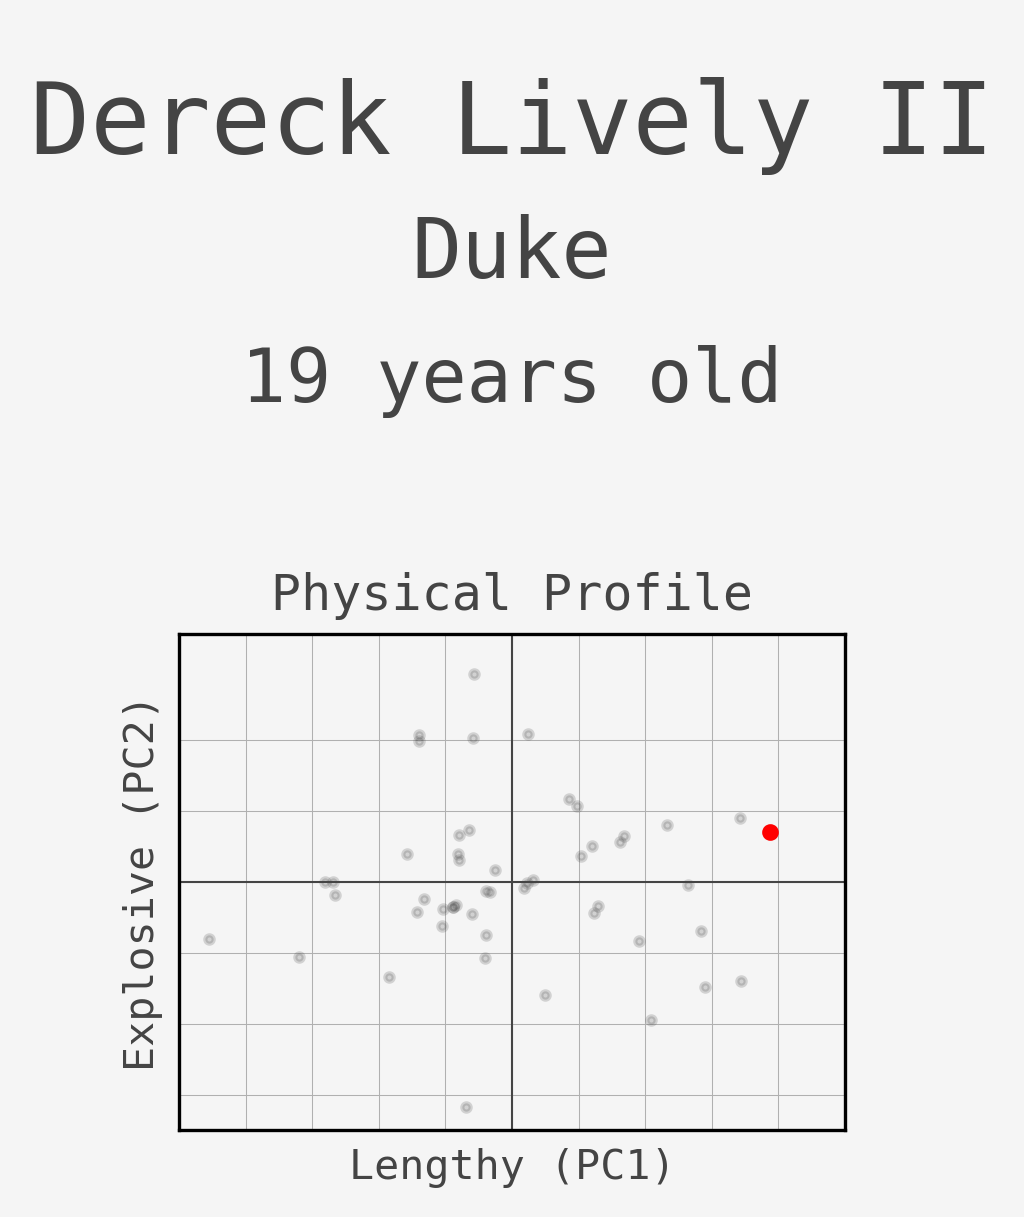

In [230]:
mpl.rcParams["font.family"]="monospace"
fig = plt.figure(figsize=(12,8), dpi=300, tight_layout=True)
fig.set_facecolor("whitesmoke")

gs = fig.add_gridspec(nrows=4, ncols=4)

ax_bio = fig.add_subplot(gs[0:1, 0])
ax_bio.axis("off")
spines = ["top", "right", "bottom", "left"]
for s in spines:
    ax_bio.spines[s].set_visible(False)

ax_bio.patch.set_facecolor("whitesmoke")
ax_bio.text(x=.5, y=.75, s=player.ncaa_player_name, ha="center", fontsize=24, c="#444444")
ax_bio.text(x=.5, y=.5, s=player.ncaa_team, ha="center", fontsize=20, c="#444444")
ax_bio.text(x=.5, y=.25, s=f"{int(player.rookie_Age)} years old", ha="center", fontsize=18, c="#444444")

ax_measurables = fig.add_subplot(gs[1:2, 0])
ax_measurables.patch.set_facecolor("whitesmoke")

ax_measurables.set_xlim(-5, 5)
ax_measurables.set_xticks(np.arange(-5, 5))
ax_measurables.set_xlabel("Lengthy (PC1)", color="#444444", size=10)
ax_measurables.set_ylim(-3.5, 3.5)
ax_measurables.set_yticks(np.arange(-3, 3))
ax_measurables.set_ylabel("Explosive (PC2)", color="#444444", size=10)
ax_measurables.tick_params(labelbottom=False, bottom=False,
                           labelleft=False, left=False) 
ax_measurables.axvline(linewidth=.5, color="#444444")
ax_measurables.axhline(linewidth=.5, color="#444444")

ax_measurables.grid(linewidth=.25, zorder=1)
ax_measurables.scatter(-1*prospects.length_pc1, -1*prospects.explosive_pc2, s=4, c="#444444",alpha=.2, zorder=2)
ax_measurables.plot(-1*player.length_pc1, -1*player.explosive_pc2, markersize=3, color="red", marker="o", zorder=3)
ax_measurables.set_title("Physical Profile", color="#444444", size=12);

In [231]:
ax_sb = fig.add_subplot(gs[2:, 0])
ax_sb.axis("off")
spines = ["top", "right", "bottom", "left"]
for s in spines:
    ax_sb.spines[s].set_visible(False)

avg_pct = 1 - (player["P(Bust)"] + player["P(Star)"])

ax_sb.bar(0, player["P(Bust)"], color="#E95C5C", edgecolor="#E95C5C")
ax_sb.text(x=0, y=player["P(Bust)"]/2, s=f"Bust: {np.round(player['P(Bust)']*100, 1)}%", ha="center", va="bottom", color="#444444")
ax_sb.bar(0, avg_pct , bottom = player["P(Bust)"], color="#E7E95C", edgecolor="#E7E95C")
ax_sb.text(x=0, y=(avg_pct/2) + player["P(Bust)"], s=f"Average: {np.round(avg_pct*100, 1)}%", ha="center", va="bottom", color="#444444", size=8)
ax_sb.bar(0, player["P(Star)"], bottom = player["P(Bust)"] + avg_pct, color="#05AE18", edgecolor="#05AE18")
ax_sb.text(x=0, y=(player["P(Star)"]/2-.01) + avg_pct + player["P(Bust)"], s=f"Star: {np.round(player['P(Star)']*100, 1)}%", ha="center", color="#444444")
ax_sb.set_title("Outcome Probabilities", color="#444444", size=12, pad=0);

In [245]:
ax_proj = fig.add_subplot(gs[0, 1:])
ax_proj.axis("off")
spines = ["top", "right", "bottom", "left"]
for s in spines:
    ax_proj.spines[s].set_visible(False)
    
ax_proj.patch.set_facecolor("whitesmoke")

import joblib
peak_scaler = joblib.load("prospect_modeling/prospect_models/peak_scaler.sav")

std_med = pd.Series(peak_scaler.transform(np.array(prospects.iloc[:,13:37]))[player.name], index=prospects.columns[13:37])
std_floor = pd.Series(peak_scaler.transform(np.array(prospects.iloc[:,37:61]))[player.name], index=prospects.columns[37:61])
std_ceiling = pd.Series(peak_scaler.transform(np.array(prospects.iloc[:,61:85]))[player.name], index=prospects.columns[61:85])

def grade_replace(n):
    if n < -.6:
        n = "F"
    elif n < -.5:
        n = "D-"
    elif n < -.4:
        n = "D"    
    elif n < -.3:
        n = "D+"
    elif n < -.2:
        n = "C-"
    elif n < -.1:
        n = "C"
    elif n < .1:
        n = "C+"
    elif n < .2:
        n = "B-"
    elif n < .3:
        n = "B"
    elif n < .4:
        n = "B+"
    elif n < .5:
        n = "A-"
    elif n < .6:
        n = "A"
    else:
        n = "A+"
    return n

med_grade = std_med.map(grade_replace)
floor_grade = std_floor.map(grade_replace)
ceiling_grade = std_ceiling.map(grade_replace)

import textwrap

ax_proj.text(x=0, y=.75, s="Projected NBA Skillset:", size=14, c="#444444")
ax_proj.text(x=0, y=.725, s=textwrap.fill(f"College Role: {player['Full Role']}", width=32, break_long_words=False), fontweight="bold", c="#444444", va="top")
ax_proj.text(x=0, y=.55, s=textwrap.fill(f"Projected NBA Role: {player['Mean Full Role']}", width=32, break_long_words=False), fontweight="bold", c="#444444", va="top")
if len(f"Projected NBA Role: {player['Mean Full Role']}") > 35:
    ax_proj.text(x=0, y=.325, s=f"- P({player['Mean_Primary_Cluster']}): {player['Mean_Primary_Cluster_Prob']}", fontsize=10, c="#444444", va="top")
    if player.Mean_Secondary_Cluster != "None":
        ax_proj.text(x=0, y=.225, s=f"- P({player['Mean_Secondary_Cluster']}): {player['Mean_Secondary_Cluster_Prob']}", fontsize=10, c="#444444", va="top")
else:
    ax_proj.text(x=0, y=.45, s=f"- P({player['Mean_Primary_Cluster']}): {player['Mean_Primary_Cluster_Prob']}", fontsize=10, c="#444444", va="top")
    if player.Mean_Secondary_Cluster != "None":
        ax_proj.text(x=0, y=.35, s=f"- P({player['Mean_Secondary_Cluster']}): {player['Mean_Secondary_Cluster_Prob']}", fontsize=10, c="#444444", va="top")

ax_proj.text(x=.35, y=.8, s=f"Inside-Scoring: {floor_grade['floor_0-3_fg%']} to {ceiling_grade['ceiling_0-3_fg%']}", ha="left", c="#444444")
ax_proj.text(x=.35, y=.6, s=f"Mid-Range Scoring: {floor_grade['floor_16-3P_fg%']} to {ceiling_grade['ceiling_16-3P_fg%']}", ha="left", c="#444444")
ax_proj.text(x=.35, y=.4, s=f"Three Point Scoring: {floor_grade['floor_3P_fg%']} to {ceiling_grade['ceiling_3P_fg%']}", ha="left", c="#444444")
ax_proj.text(x=.35, y=.2, s=f"Scoring Efficiency: {floor_grade['floor_PPP']} to {ceiling_grade['ceiling_PPP']}", ha="left", c="#444444")

ax_proj.text(x=.7, y=.8, s=f"Rebounding: {floor_grade['floor_DRB%']} to {ceiling_grade['ceiling_DRB%']}", ha="left", c="#444444")
ax_proj.text(x=.7, y=.6, s=f"Playmaking: {floor_grade['floor_AST_2_TOV']} to {ceiling_grade['ceiling_AST_2_TOV']}", ha="left", c="#444444")
ax_proj.text(x=.7, y=.4, s=f"Rim Protection: {floor_grade['floor_BLK%']} to {ceiling_grade['ceiling_BLK%']}", ha="left", c="#444444")
ax_proj.text(x=.7, y=.2, s=f"Perimeter D: {floor_grade['floor_STL%']} to {ceiling_grade['ceiling_STL%']}", ha="left", c="#444444");

In [233]:
ax_comp = fig.add_subplot(gs[3, 1:])
ax_comp.axis("off")
spines = ["top", "right", "bottom", "left"]
for s in spines:
    ax_comp.spines[s].set_visible(False)
    
ax_comp.patch.set_facecolor("whitesmoke")

ax_comp.text(x=.2, y=.8, s="Floor Outcome", fontsize=14, ha='center', c="#444444")
ax_comp.text(x=.5, y=.8, s="Median Outcome", fontsize=14, ha='center', c="#444444")
ax_comp.text(x=.8, y=.8, s="Peak Outcome", fontsize=14, ha='center', c="#444444")

ax_comp.text(x=.2, y=.6, s=f"{player.floor_comp}", fontweight="bold", fontsize=16, ha='center', c="#444444")
ax_comp.text(x=.5, y=.6, s=f"{player.med_comp}", fontweight="bold", fontsize=16, ha='center', c="#444444")
ax_comp.text(x=.8, y=.6, s=f"{player.ceiling_comp}", fontweight="bold", fontsize=16, ha='center', c="#444444")

ax_comp.text(x=.2, y=.35, s=f"{player.floor_comp_pts} PTS/{player.floor_comp_reb} REB/{player.floor_comp_ast} AST", fontsize=10, ha='center', c="#444444")
ax_comp.text(x=.5, y=.35, s=f"{player.med_comp_pts} PTS/{player.med_comp_reb} REB/{player.med_comp_ast} AST", fontsize=10, ha='center', c="#444444")
ax_comp.text(x=.8, y=.35, s=f"{player.ceiling_comp_pts} PTS/{player.ceiling_comp_reb} REB/{player.ceiling_comp_ast} AST", fontsize=10, ha='center', c="#444444")

ax_comp.text(x=.2, y=.25, s=f"{player.floor_comp_dbpm} D-BPM", fontsize=10, ha='center', c="#444444")
ax_comp.text(x=.5, y=.25, s=f"{player.med_comp_dbpm} D-BPM", fontsize=10, ha='center', c="#444444")
ax_comp.text(x=.8, y=.25, s=f"{player.ceiling_comp_dbpm} D-BPM", fontsize=10, ha='center', c="#444444")

ax_comp.text(x=.5, y=.1, s=f"Counting stats per 100 possessions", fontsize=8, fontstyle="italic", ha='center', c="#444444")

ax_comp.set_title("NBA Comparisons", size=18, c="#444444");

In [234]:
ax_shot_chart = fig.add_subplot(gs[1:3, 2:])
ax_shot_chart.axis("off")
spines = ["top", "right", "bottom", "left"]
for s in spines:
    ax_shot_chart.spines[s].set_visible(False)
    
ax_shot_chart.patch.set_facecolor("whitesmoke")
    
# taking court function from http://savvastjortjoglou.com/nba-shot-sharts.html
from matplotlib.patches import Circle, Rectangle, Arc

def shot_color(value):
    color = None
    if value < -1:
        color = "#DC1818"
    elif (value < -.5) & (color is None):
        color = "#F57474"
    elif (value < .5) & (color is None):
        color = "whitesmoke"
    elif (value < 1)  & (color is None):
        color = "#96E2A1"
    else:
        color = "#06951C"
    return color
        
rim_color = shot_color(player["ncaa_rim_fg%"])
mid_color = shot_color(player["ncaa_mid_fg%"])
three_color = shot_color(player["ncaa_3p%"])

def arc_patch(center, radius, theta1, theta2, ax=None, resolution=50, **kwargs):

    theta = np.linspace(np.radians(theta1), np.radians(theta2), resolution)
    points = np.vstack((radius*np.cos(theta) + center[0], 
                        radius*np.sin(theta) + center[1]))

    poly = patches.Polygon(points.T, closed=True, **kwargs)
    return poly

hoop = Circle((0, 0), radius=7.5, linewidth=2, color="#444444", fill=False)

backboard = Rectangle((-30, -7.5), 60, -1, linewidth=2, color="#444444")

outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=2, facecolor=rim_color, edgecolor="#444444",
                      fill=True)

inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=2, color="#444444",
                      fill=False)

top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                     linewidth=2, color="#444444", fill=False)

bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                        linewidth=2, color="#444444", linestyle='dashed')

restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=2,
                 color="#444444")

corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=2,
                           color="#444444")
corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=2, color="#444444")

three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=2, color="#444444")

mid_range_arc = arc_patch((0, 0), 238, 22, 158, color=mid_color)
mid_range_rectangle = Rectangle((-220, -47.5), 440, 140, linewidth=2, color=mid_color, fill=True)

court_rectangle = Rectangle((-250, -47.5), 500, 350, linewidth=2, color=three_color, fill=True)
outline_rectangle = Rectangle((-250, -47.5), 500, 350, linewidth=1, color="#444444", fill=False)

court_elements = [court_rectangle, mid_range_rectangle, mid_range_arc, three_arc, corner_three_b, corner_three_a,  
                  top_free_throw, outer_box, inner_box, bottom_free_throw, 
                  restricted, backboard, hoop, outline_rectangle]

for element in court_elements:
    ax_shot_chart.add_patch(element)
    
ax_shot_chart.set_xlim(-300, 400)
ax_shot_chart.set_ylim(-100, 350)

ax_shot_chart.text(x=.5, y=325, s="NCAA Shooting Skill", fontsize=14, ha='center', color="#444444");

In [235]:
ax_scout = fig.add_subplot(gs[1:3, 1:2])
ax_scout.axis("off")
spines = ["top", "right", "bottom", "left"]
for s in spines:
    ax_shot_chart.spines[s].set_visible(False)
    
ax_scout.patch.set_facecolor("whitesmoke")

import textwrap

ax_scout.text(.05, 1, textwrap.fill(f"Projected Range: {player['projected_range']}", width=25, break_long_words=False), ha="left", va='top', fontsize=12, color="#444444")

scout_report = textwrap.fill(player["scouting_report"], width=25, break_long_words=False)
ax_scout.text(.05, .85, scout_report, ha='left', va='top', 
              fontsize = 13, wrap=True, color="#444444");

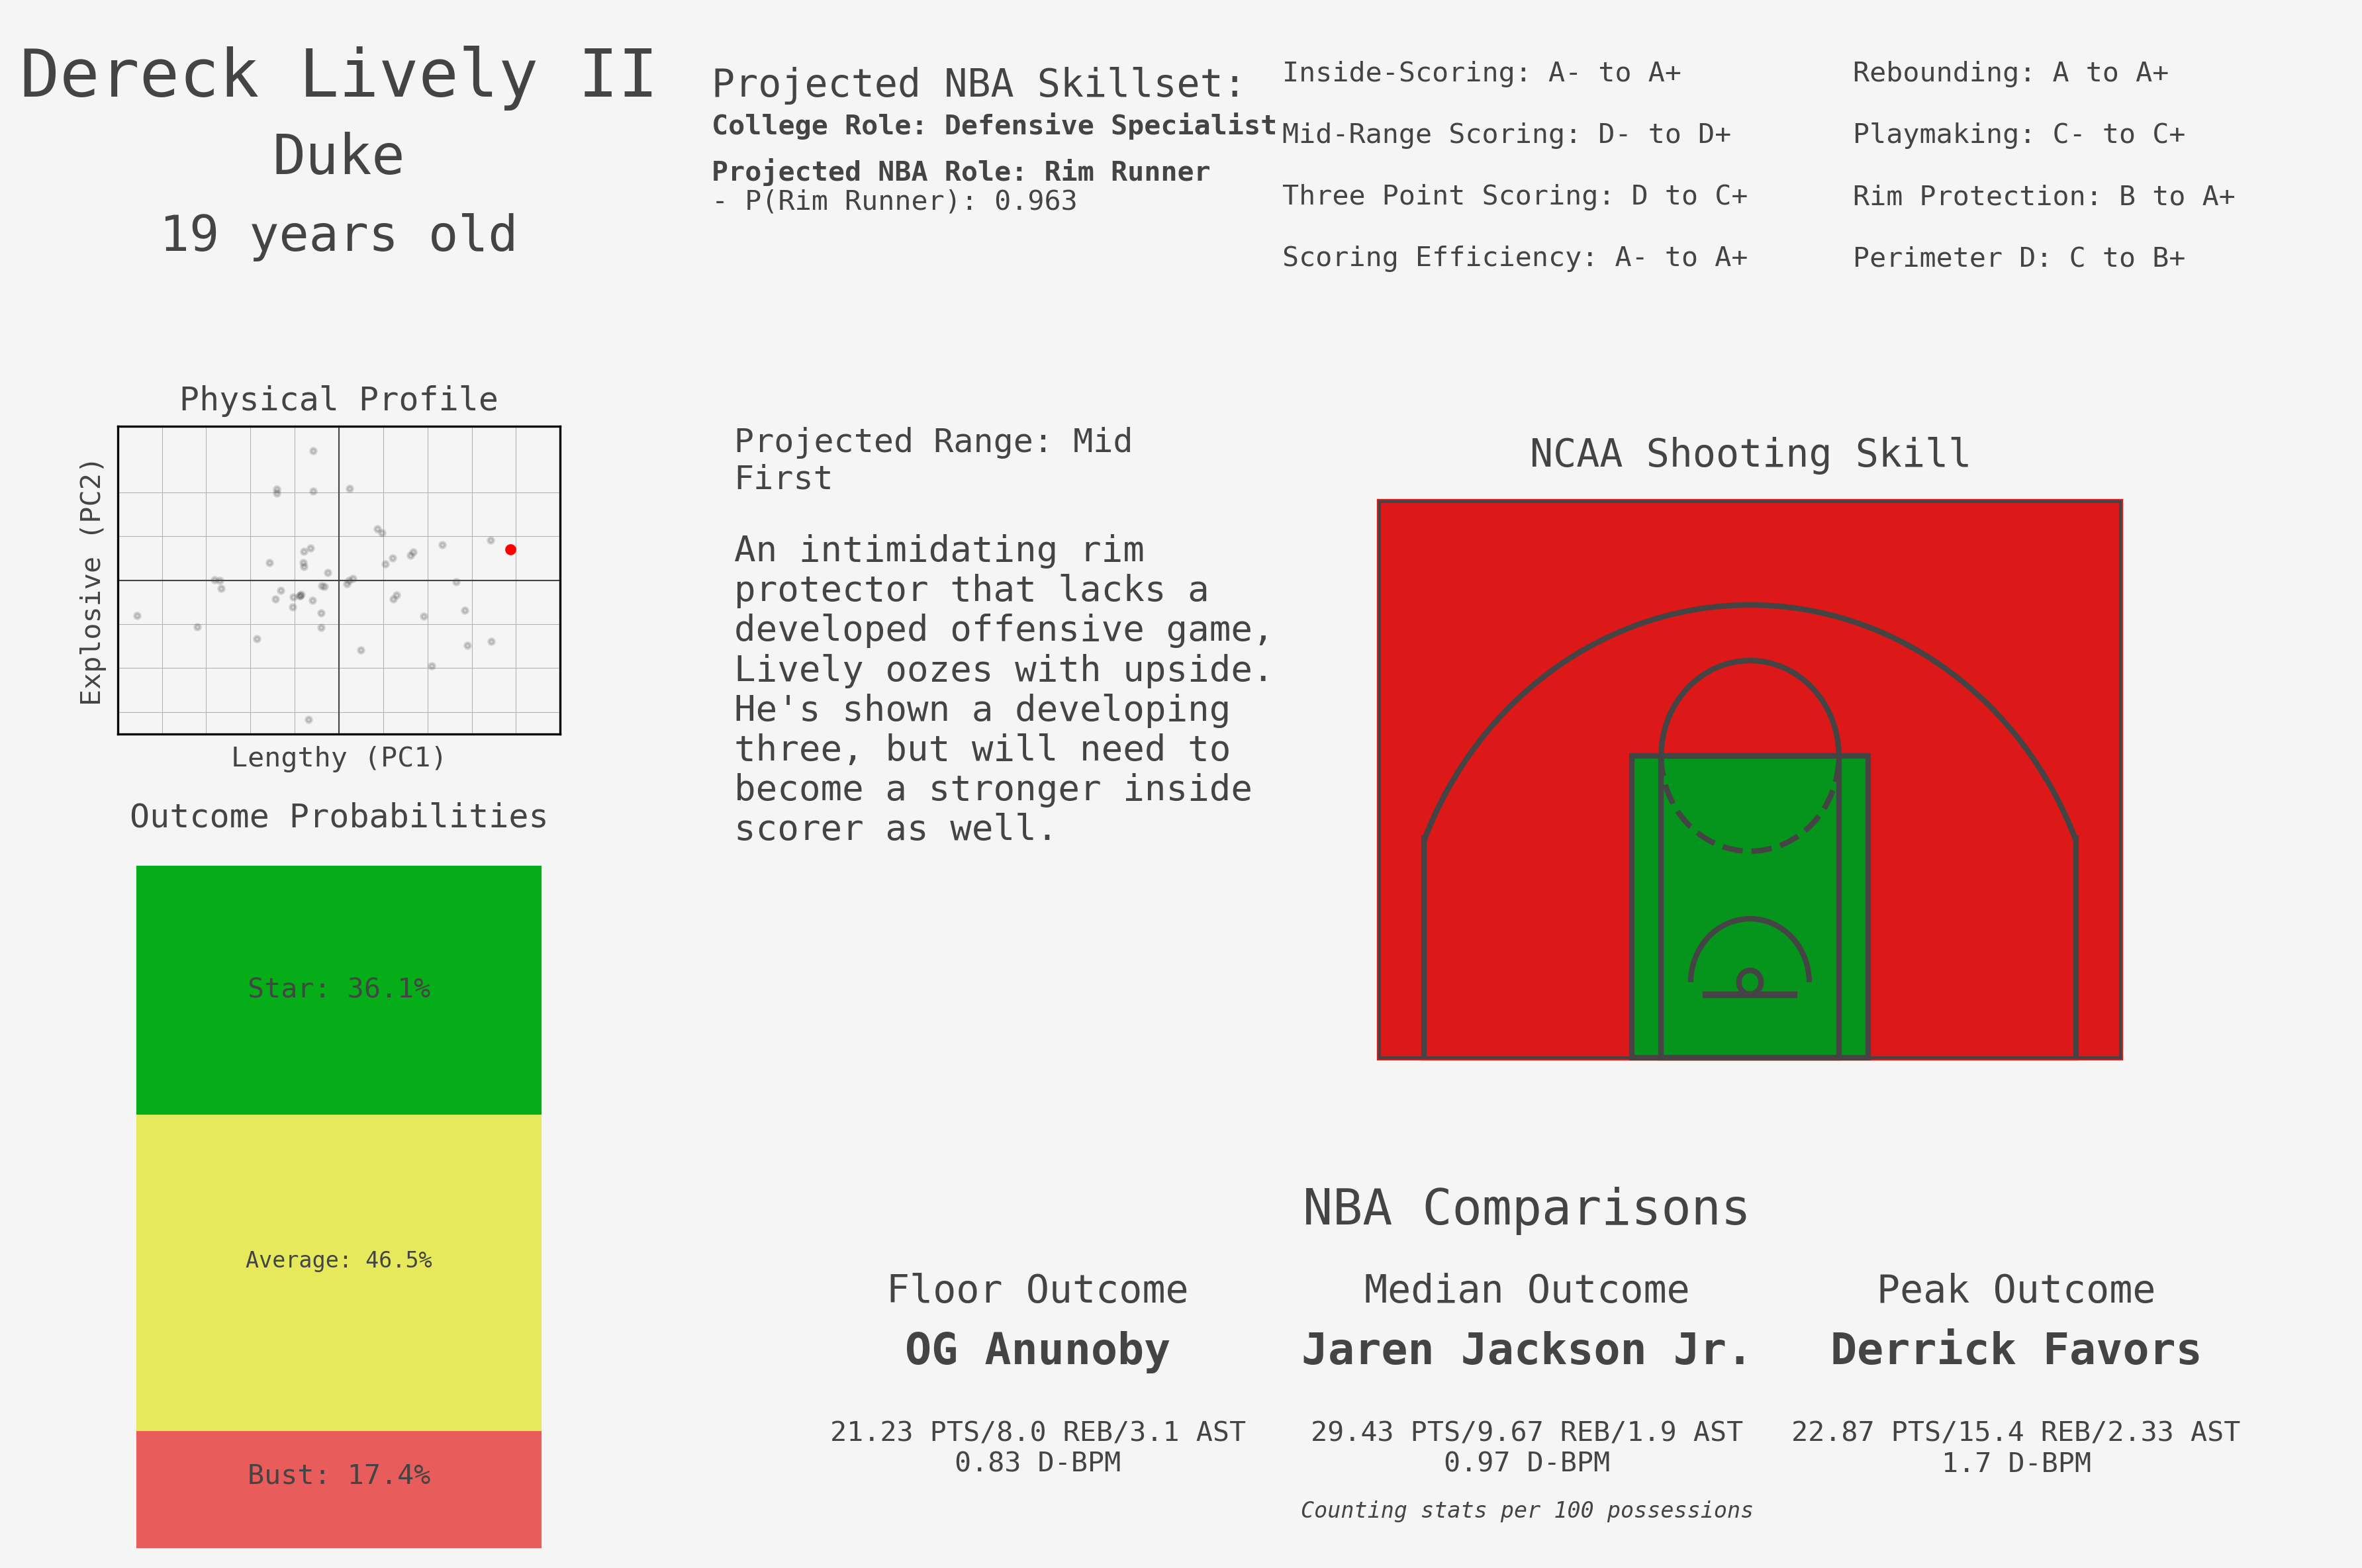

In [236]:
fig

In [267]:
def create_scout_report(player):
    import numpy as np
    import pandas as pd

    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    import matplotlib.gridspec as gridspec
    %matplotlib inline
    
    mpl.rcParams["font.family"]="monospace"
    fig = plt.figure(figsize=(12,8), dpi=300, tight_layout=True)
    fig.set_facecolor("whitesmoke")

    gs = fig.add_gridspec(nrows=4, ncols=4)

    ax_bio = fig.add_subplot(gs[0:1, 0])
    ax_bio.axis("off")
    spines = ["top", "right", "bottom", "left"]
    for s in spines:
        ax_bio.spines[s].set_visible(False)

    ax_bio.patch.set_facecolor("whitesmoke")
    ax_bio.text(x=.5, y=.75, s=player.ncaa_player_name, ha="center", fontsize=24, c="#444444")
    ax_bio.text(x=.5, y=.5, s=player.ncaa_team, ha="center", fontsize=20, c="#444444")
    ax_bio.text(x=.5, y=.25, s=f"{int(player.rookie_Age)} years old", ha="center", fontsize=18, c="#444444")

    ax_measurables = fig.add_subplot(gs[1:2, 0])
    ax_measurables.patch.set_facecolor("whitesmoke")

    ax_measurables.set_xlim(-5, 5)
    ax_measurables.set_xticks(np.arange(-5, 5))
    ax_measurables.set_xlabel("Lengthy (PC1)", color="#444444", size=10)
    ax_measurables.set_ylim(-3.5, 3.5)
    ax_measurables.set_yticks(np.arange(-3, 3))
    ax_measurables.set_ylabel("Explosive (PC2)", color="#444444", size=10)
    ax_measurables.tick_params(labelbottom=False, bottom=False,
                               labelleft=False, left=False) 
    ax_measurables.axvline(linewidth=.5, color="#444444")
    ax_measurables.axhline(linewidth=.5, color="#444444")

    ax_measurables.grid(linewidth=.25, zorder=1)
    ax_measurables.scatter(-1*prospects.length_pc1, -1*prospects.explosive_pc2, s=4, c="#444444",alpha=.2, zorder=2)
    ax_measurables.plot(-1*player.length_pc1, -1*player.explosive_pc2, markersize=3, color="red", marker="o", zorder=3)
    ax_measurables.set_title("Physical Profile", color="#444444", size=12)
    
    ax_sb = fig.add_subplot(gs[2:, 0])
    ax_sb.axis("off")
    spines = ["top", "right", "bottom", "left"]
    for s in spines:
        ax_sb.spines[s].set_visible(False)

    avg_pct = 1 - (player["P(Bust)"] + player["P(Star)"])

    ax_sb.bar(0, player["P(Bust)"], color="#E95C5C", edgecolor="#E95C5C")
    ax_sb.text(x=0, y=player["P(Bust)"]/2, s=f"Bust: {np.round(player['P(Bust)']*100, 1)}%", ha="center", va="bottom", color="#444444")
    ax_sb.bar(0, avg_pct , bottom = player["P(Bust)"], color="#E7E95C", edgecolor="#E7E95C")
    ax_sb.text(x=0, y=(avg_pct/2) + player["P(Bust)"], s=f"Average: {np.round(avg_pct*100, 1)}%", ha="center", va="bottom", color="#444444", size=8)
    ax_sb.bar(0, player["P(Star)"], bottom = player["P(Bust)"] + avg_pct, color="#05AE18", edgecolor="#05AE18")
    ax_sb.text(x=0, y=(player["P(Star)"]/2-.01) + avg_pct + player["P(Bust)"], s=f"Star: {np.round(player['P(Star)']*100, 1)}%", ha="center", color="#444444")
    ax_sb.set_title("Outcome Probabilities", color="#444444", size=12, pad=0)
    
    ax_proj = fig.add_subplot(gs[0, 1:])
    ax_proj.axis("off")
    spines = ["top", "right", "bottom", "left"]
    for s in spines:
        ax_proj.spines[s].set_visible(False)

    ax_proj.patch.set_facecolor("whitesmoke")

    import joblib
    peak_scaler = joblib.load("prospect_modeling/prospect_models/peak_scaler.sav")

    std_med = pd.Series(peak_scaler.transform(np.array(prospects.iloc[:,13:37]))[player.name], index=prospects.columns[13:37])
    std_floor = pd.Series(peak_scaler.transform(np.array(prospects.iloc[:,37:61]))[player.name], index=prospects.columns[37:61])
    std_ceiling = pd.Series(peak_scaler.transform(np.array(prospects.iloc[:,61:85]))[player.name], index=prospects.columns[61:85])

    def grade_replace(n):
        if n < -.6:
            n = "F"
        elif n < -.5:
            n = "D-"
        elif n < -.4:
            n = "D"    
        elif n < -.3:
            n = "D+"
        elif n < -.2:
            n = "C-"
        elif n < -.1:
            n = "C"
        elif n < .1:
            n = "C+"
        elif n < .2:
            n = "B-"
        elif n < .3:
            n = "B"
        elif n < .4:
            n = "B+"
        elif n < .5:
            n = "A-"
        elif n < .6:
            n = "A"
        else:
            n = "A+"
        return n

    med_grade = std_med.map(grade_replace)
    floor_grade = std_floor.map(grade_replace)
    ceiling_grade = std_ceiling.map(grade_replace)

    import textwrap

    ax_proj.text(x=0, y=.75, s="Projected NBA Skillset:", size=14, c="#444444")
    ax_proj.text(x=0, y=.725, s=textwrap.fill(f"College Role: {player['Full Role']}", width=32, break_long_words=False), fontweight="bold", c="#444444", va="top")
    ax_proj.text(x=0, y=.525, s=textwrap.fill(f"Projected NBA Role: {player['Mean Full Role']}", width=32, break_long_words=False), fontweight="bold", c="#444444", va="top")
    if len(f"Projected NBA Role: {player['Mean Full Role']}") > 32:
        ax_proj.text(x=0, y=.3, s=f"- P({player['Mean_Primary_Cluster']}): {player['Mean_Primary_Cluster_Prob']}", fontsize=10, c="#444444", va="top")
        if player.Mean_Secondary_Cluster != "None":
            ax_proj.text(x=0, y=.2, s=f"- P({player['Mean_Secondary_Cluster']}): {player['Mean_Secondary_Cluster_Prob']}", fontsize=10, c="#444444", va="top")
    else:
        ax_proj.text(x=0, y=.425, s=f"- P({player['Mean_Primary_Cluster']}): {player['Mean_Primary_Cluster_Prob']}", fontsize=10, c="#444444", va="top")
        if player.Mean_Secondary_Cluster != "None":
            ax_proj.text(x=0, y=.325, s=f"- P({player['Mean_Secondary_Cluster']}): {player['Mean_Secondary_Cluster_Prob']}", fontsize=10, c="#444444", va="top")

    ax_proj.text(x=.35, y=.8, s=f"Inside-Scoring: {floor_grade['floor_0-3_fg%']} to {ceiling_grade['ceiling_0-3_fg%']}", ha="left", c="#444444")
    ax_proj.text(x=.35, y=.6, s=f"Mid-Range Scoring: {floor_grade['floor_16-3P_fg%']} to {ceiling_grade['ceiling_16-3P_fg%']}", ha="left", c="#444444")
    ax_proj.text(x=.35, y=.4, s=f"Three Point Scoring: {floor_grade['floor_3P_fg%']} to {ceiling_grade['ceiling_3P_fg%']}", ha="left", c="#444444")
    ax_proj.text(x=.35, y=.2, s=f"Scoring Efficiency: {floor_grade['floor_PPP']} to {ceiling_grade['ceiling_PPP']}", ha="left", c="#444444")

    ax_proj.text(x=.7, y=.8, s=f"Rebounding: {floor_grade['floor_DRB%']} to {ceiling_grade['ceiling_DRB%']}", ha="left", c="#444444")
    ax_proj.text(x=.7, y=.6, s=f"Playmaking: {floor_grade['floor_AST_2_TOV']} to {ceiling_grade['ceiling_AST_2_TOV']}", ha="left", c="#444444")
    ax_proj.text(x=.7, y=.4, s=f"Rim Protection: {floor_grade['floor_BLK%']} to {ceiling_grade['ceiling_BLK%']}", ha="left", c="#444444")
    ax_proj.text(x=.7, y=.2, s=f"Perimeter D: {floor_grade['floor_STL%']} to {ceiling_grade['ceiling_STL%']}", ha="left", c="#444444")
    
    ax_comp = fig.add_subplot(gs[3, 1:])
    ax_comp.axis("off")
    spines = ["top", "right", "bottom", "left"]
    for s in spines:
        ax_comp.spines[s].set_visible(False)

    ax_comp.patch.set_facecolor("whitesmoke")

    ax_comp.text(x=.2, y=.8, s="Floor Outcome", fontsize=14, ha='center', c="#444444")
    ax_comp.text(x=.5, y=.8, s="Median Outcome", fontsize=14, ha='center', c="#444444")
    ax_comp.text(x=.8, y=.8, s="Peak Outcome", fontsize=14, ha='center', c="#444444")

    ax_comp.text(x=.2, y=.7, s=textwrap.fill(f"{player.floor_comp}", width=20, break_long_words=False), fontweight="bold", fontsize=15, ha='center', va="top", c="#444444")
    ax_comp.text(x=.5, y=.7, s=textwrap.fill(f"{player.med_comp}", width=20, break_long_words=False), fontweight="bold", fontsize=15, ha='center', va="top", c="#444444")
    ax_comp.text(x=.8, y=.7, s=textwrap.fill(f"{player.ceiling_comp}", width=20, break_long_words=False), fontweight="bold", fontsize=15, ha='center', va="top", c="#444444")

    ax_comp.text(x=.2, y=.3, s=f"{player.floor_comp_pts} PTS/{player.floor_comp_reb} REB/{player.floor_comp_ast} AST", fontsize=10, ha='center', c="#444444")
    ax_comp.text(x=.5, y=.3, s=f"{player.med_comp_pts} PTS/{player.med_comp_reb} REB/{player.med_comp_ast} AST", fontsize=10, ha='center', c="#444444")
    ax_comp.text(x=.8, y=.3, s=f"{player.ceiling_comp_pts} PTS/{player.ceiling_comp_reb} REB/{player.ceiling_comp_ast} AST", fontsize=10, ha='center', c="#444444")

    ax_comp.text(x=.2, y=.2, s=f"{player.floor_comp_dbpm} D-BPM", fontsize=10, ha='center', c="#444444")
    ax_comp.text(x=.5, y=.2, s=f"{player.med_comp_dbpm} D-BPM", fontsize=10, ha='center', c="#444444")
    ax_comp.text(x=.8, y=.2, s=f"{player.ceiling_comp_dbpm} D-BPM", fontsize=10, ha='center', c="#444444")

    ax_comp.text(x=.5, y=.1, s=f"Counting stats per 100 possessions", fontsize=8, fontstyle="italic", ha='center', c="#444444")

    ax_comp.set_title("NBA Comparisons", size=18, c="#444444")
    
    ax_shot_chart = fig.add_subplot(gs[1:3, 2:])
    ax_shot_chart.axis("off")
    spines = ["top", "right", "bottom", "left"]
    for s in spines:
        ax_shot_chart.spines[s].set_visible(False)

    ax_shot_chart.patch.set_facecolor("whitesmoke")

    # taking court function from http://savvastjortjoglou.com/nba-shot-sharts.html
    from matplotlib.patches import Circle, Rectangle, Arc

    def shot_color(value):
        color = None
        if value < -1:
            color = "#DC1818"
        elif (value < -.5) & (color is None):
            color = "#F57474"
        elif (value < .5) & (color is None):
            color = "whitesmoke"
        elif (value < 1)  & (color is None):
            color = "#96E2A1"
        else:
            color = "#06951C"
        return color

    rim_color = shot_color(player["ncaa_rim_fg%"])
    mid_color = shot_color(player["ncaa_mid_fg%"])
    three_color = shot_color(player["ncaa_3p%"])

    def arc_patch(center, radius, theta1, theta2, ax=None, resolution=50, **kwargs):

        theta = np.linspace(np.radians(theta1), np.radians(theta2), resolution)
        points = np.vstack((radius*np.cos(theta) + center[0], 
                            radius*np.sin(theta) + center[1]))

        poly = patches.Polygon(points.T, closed=True, **kwargs)
        return poly

    hoop = Circle((0, 0), radius=7.5, linewidth=2, color="#444444", fill=False)

    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=2, color="#444444")

    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=2, facecolor=rim_color, edgecolor="#444444",
                          fill=True)

    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=2, color="#444444",
                          fill=False)

    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=2, color="#444444", fill=False)

    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=2, color="#444444", linestyle='dashed')

    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=2,
                     color="#444444")

    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=2,
                               color="#444444")
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=2, color="#444444")

    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=2, color="#444444")

    mid_range_arc = arc_patch((0, 0), 238, 22, 158, color=mid_color)
    mid_range_rectangle = Rectangle((-220, -47.5), 440, 140, linewidth=2, color=mid_color, fill=True)

    court_rectangle = Rectangle((-250, -47.5), 500, 350, linewidth=2, color=three_color, fill=True)
    outline_rectangle = Rectangle((-250, -47.5), 500, 350, linewidth=1, color="#444444", fill=False)

    court_elements = [court_rectangle, mid_range_rectangle, mid_range_arc, three_arc, corner_three_b, corner_three_a,  
                      top_free_throw, outer_box, inner_box, bottom_free_throw, 
                      restricted, backboard, hoop, outline_rectangle]

    for element in court_elements:
        ax_shot_chart.add_patch(element)

    ax_shot_chart.set_xlim(-300, 400)
    ax_shot_chart.set_ylim(-100, 350)

    ax_shot_chart.text(x=.5, y=325, s="NCAA Shooting Skill", fontsize=14, ha='center', color="#444444")
    
    ax_scout = fig.add_subplot(gs[1:3, 1:2])
    ax_scout.axis("off")
    spines = ["top", "right", "bottom", "left"]
    for s in spines:
        ax_shot_chart.spines[s].set_visible(False)

    ax_scout.patch.set_facecolor("whitesmoke")

    import textwrap

    ax_scout.text(.05, 1, textwrap.fill(f"Projected Range: {player['projected_range']}", width=25, break_long_words=False), ha="left", va='top', fontsize=12, color="#444444")

    scout_report = textwrap.fill(player["scouting_report"], width=25, break_long_words=False)
    ax_scout.text(.05, .85, scout_report, ha='left', va='top', 
                  fontsize = 13, wrap=True, color="#444444")
    ax_scout.text(.05, .05, "Work by Donald Cayton | @de_cayton \nData from: \n- sportsreference\n- barttorvik", color="#444444", fontsize=8, fontstyle="oblique")

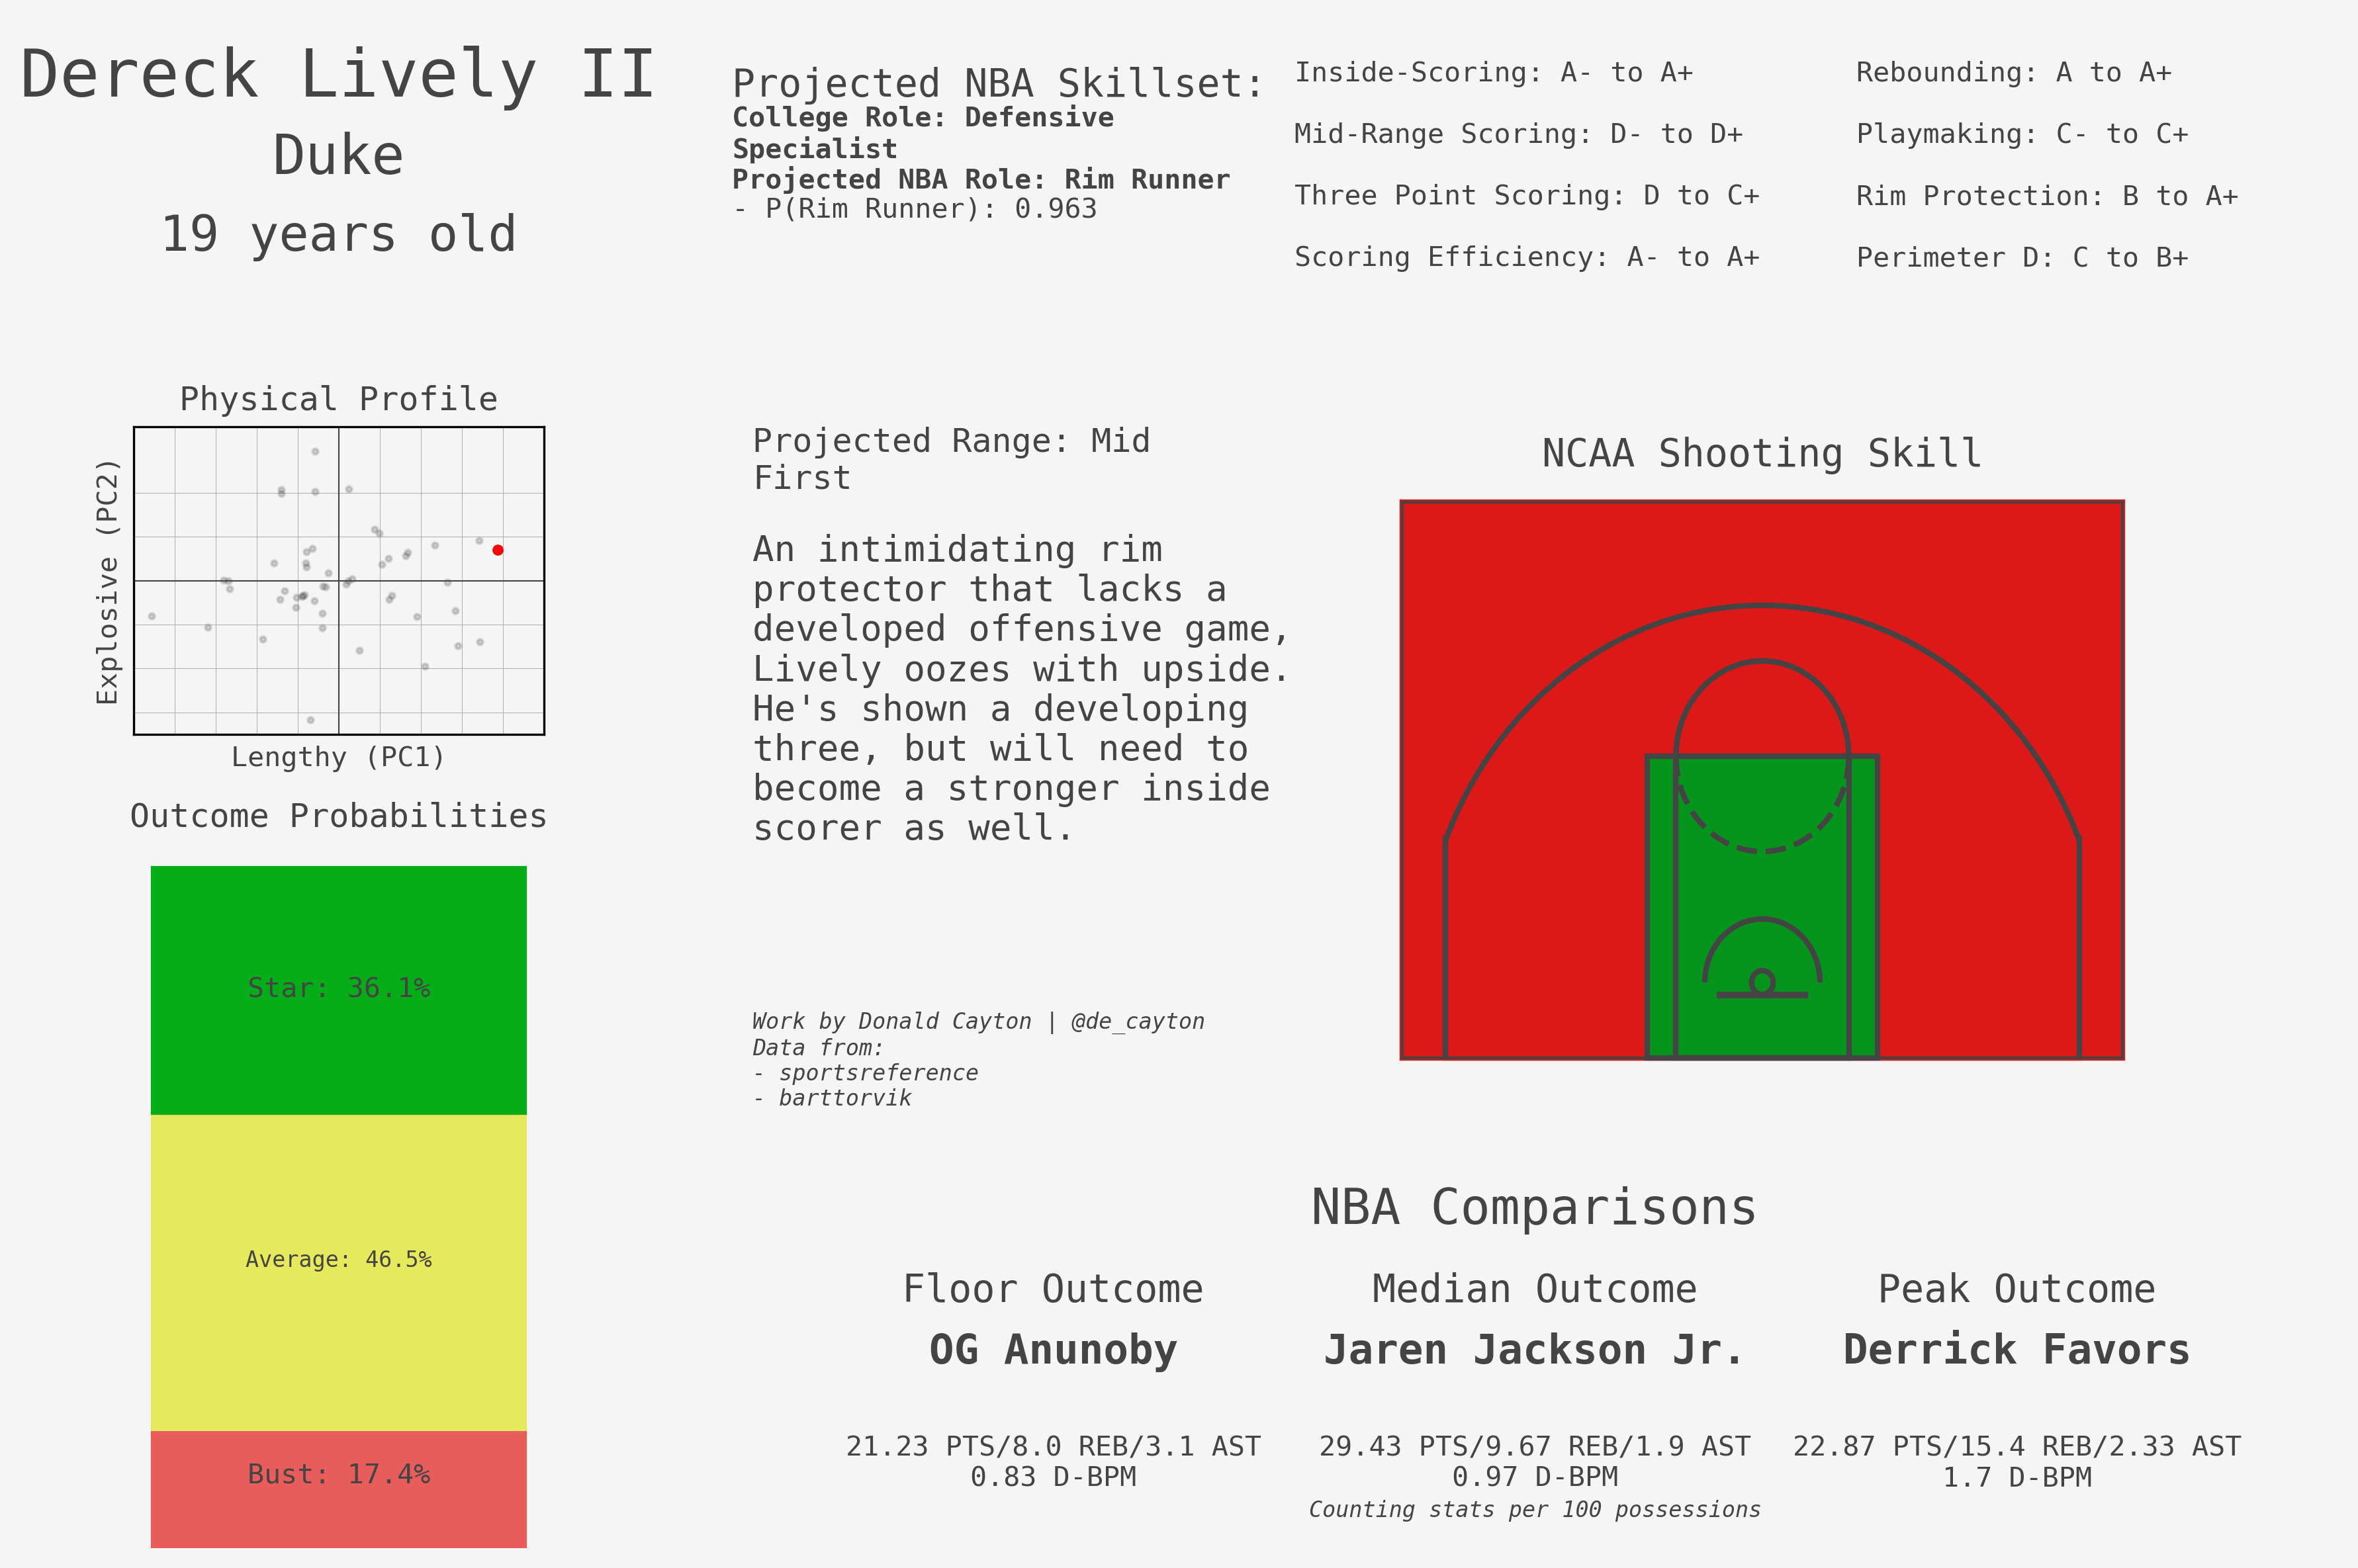

In [268]:
create_scout_report(player)

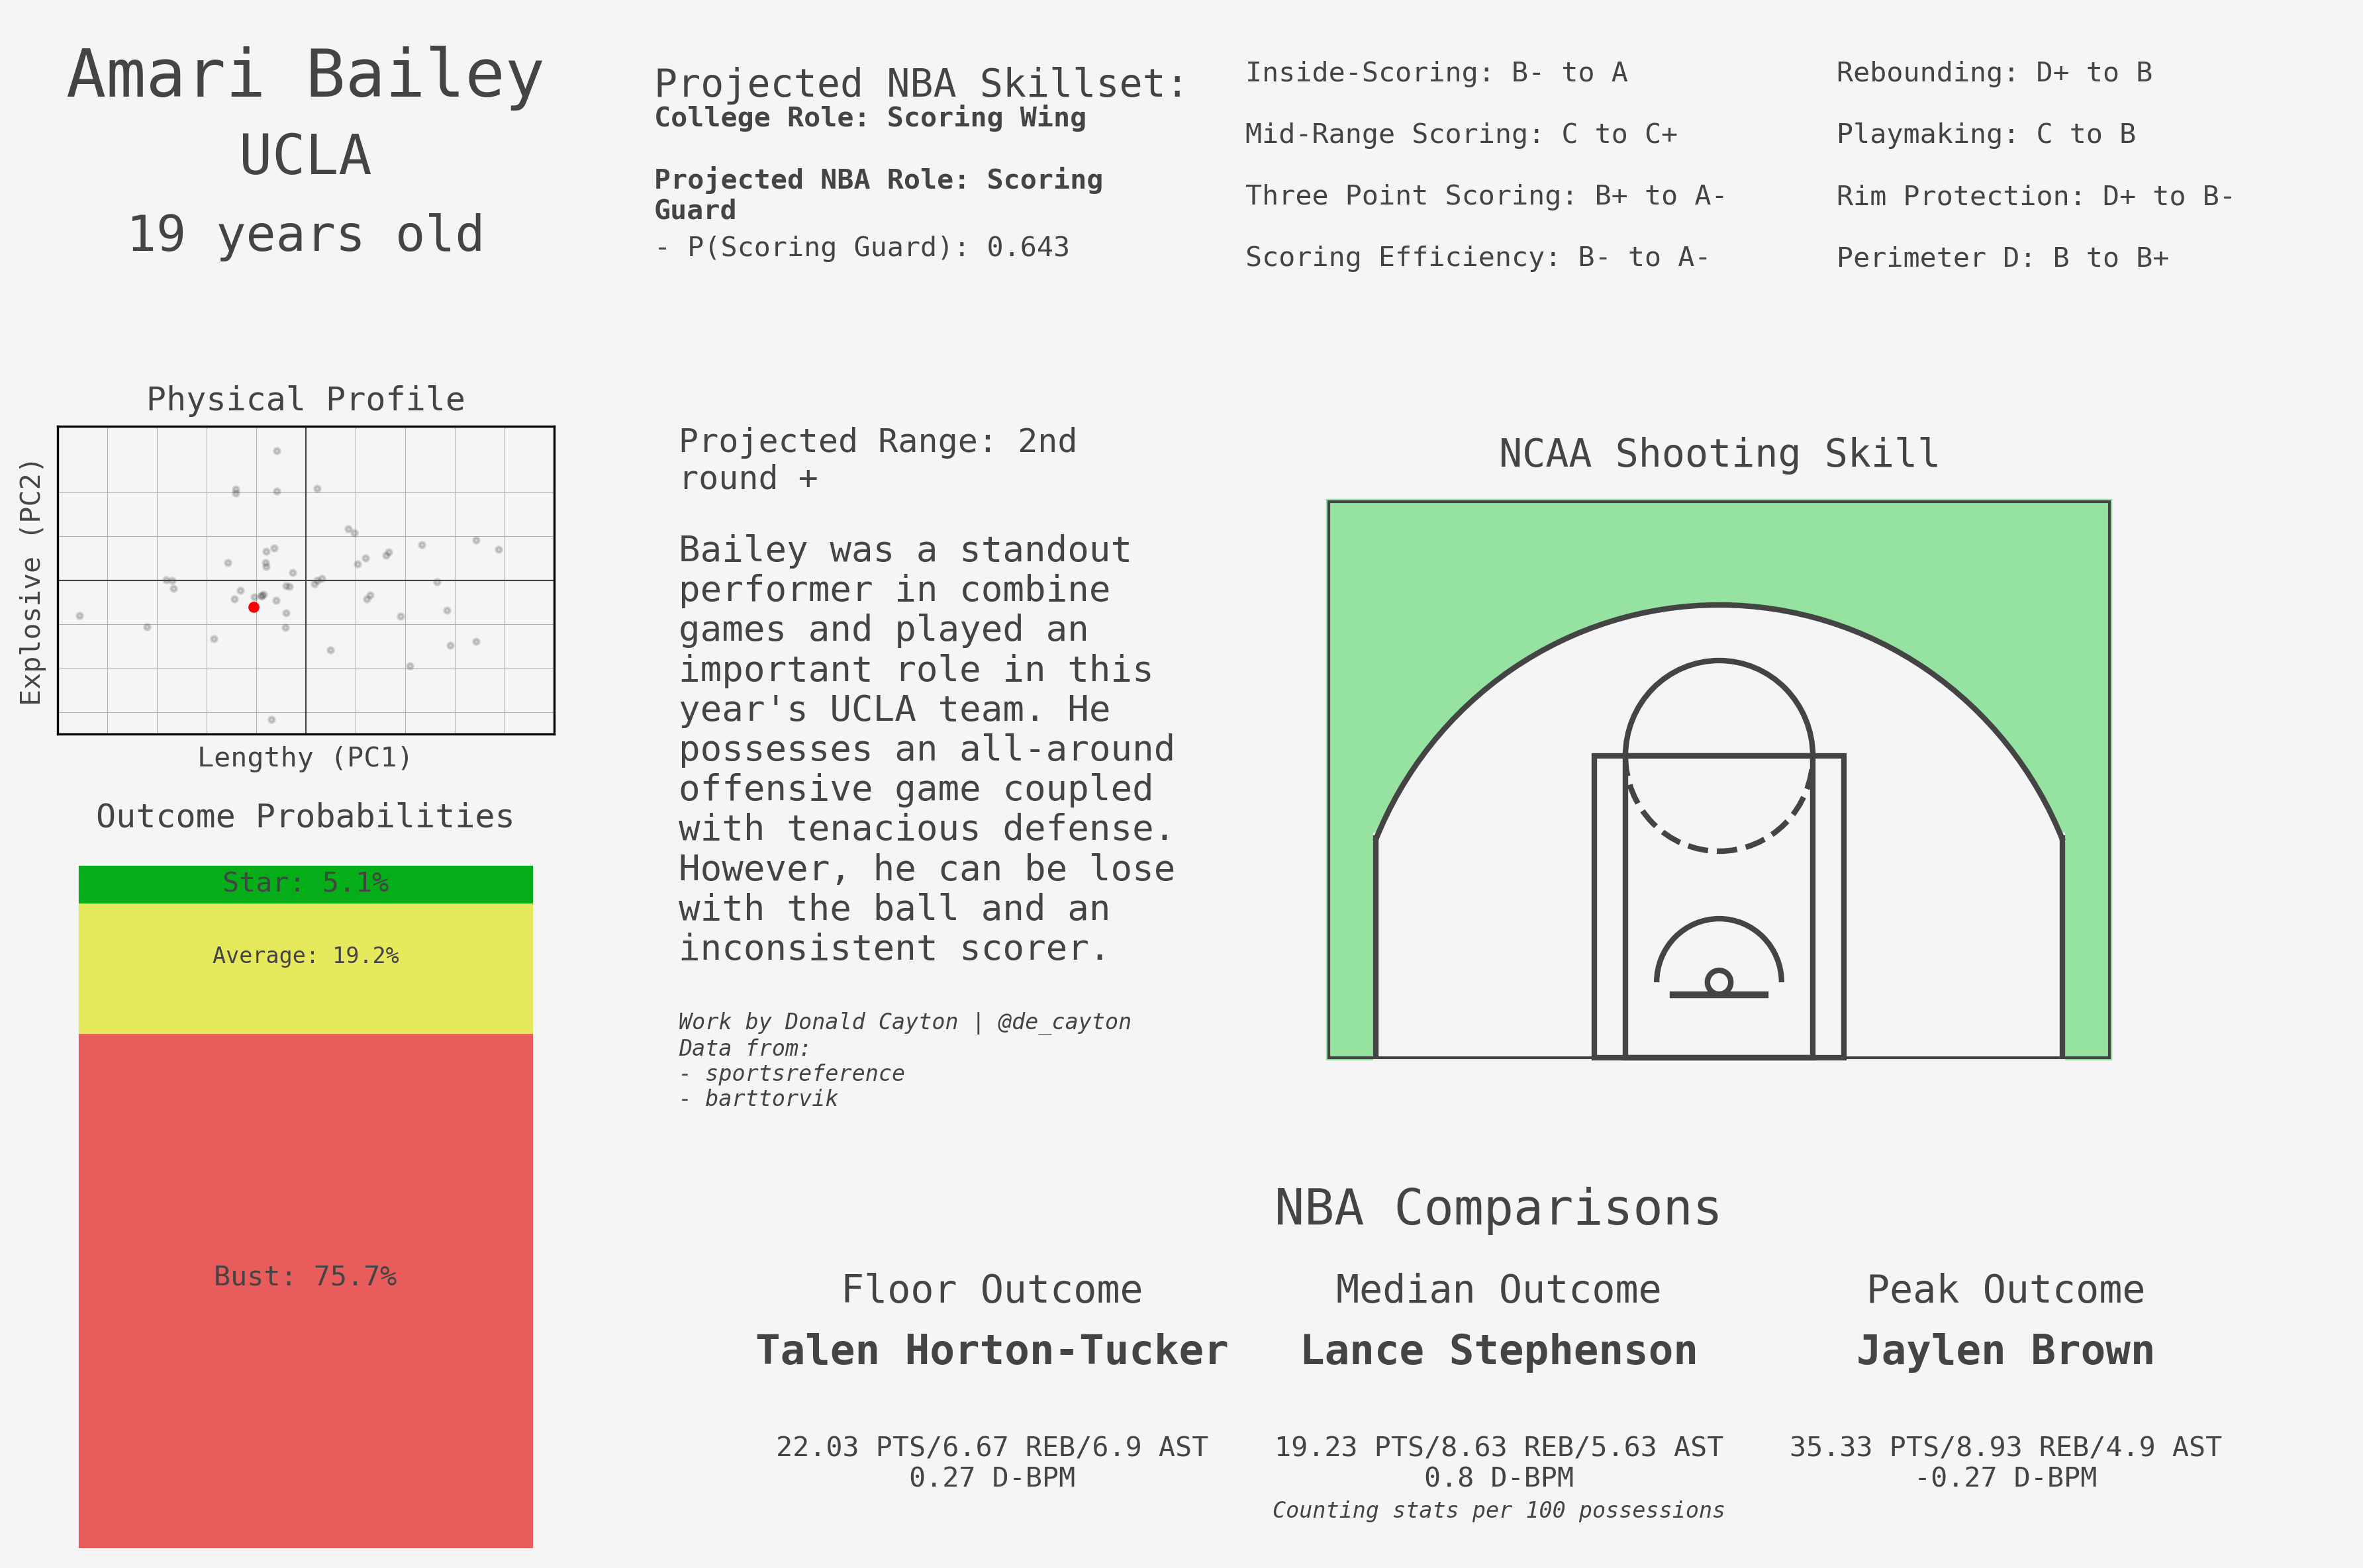

In [269]:
from matplotlib.backends.backend_pdf import PdfPages

draft_guide = PdfPages('draft_guide.pdf')

for i, row in prospects.iterrows():
    prospect_plot = create_scout_report(row)
    draft_guide.savefig(prospect_plot)
    
draft_guide.close()